# Tracé de courbes

## Affichage formatté : f-string

Une chaine de caractères formatée littérale ou *f-string* est une chaine de caractères littérale préfixée par `f` ou `F`. Ces chaines peuvent contenir des champs à remplacer, c'est-à-dire des expressions délimitées par des accolades `{}`. Alors que les autres littéraux de chaines ont des valeurs constantes, les chaines formatées sont de vraies expressions évaluées à l'exécution.

Les séquences d'échappement sont décodées comme à l'intérieur des chaînes de caractères ordinaires (sauf lorsqu'une chaîne de caractères est également marquée comme une chaîne brute). Après décodage, la grammaire s'appliquant au contenu de la chaîne de caractères est :
>**Syntaxe :** (mot clef `f`)
>
>f ' < texte > { < expression/variable > : < format > } < texte > ... '  
> avec, pour les nombres à virgules, le format  
> [ alignement ] [ signe ] [ largeur ] [ groupage ] [ .précision ] [ type ]
>+ *alignement :* détermine ou le nombre est aligné dans sa zone  
>> “>” aligne à droite  
>> “<” aligne à gauche  
>> “^” centré  
>> “=” aligne le signe à gauche et le nombre à droite
>+ *signe :* détermine l’affichage du signe  
>> “+” indique que le signe + doit être affiché ainsi que le -  
>> “-“ indique que le signe - doit être affiché (par defaut)  
>> “ “ n’affiche pas le + mais insére un espace à la place  
>+ *largeur :* détermine la place qui doit être réservée pour l’affichage du nombre  
>+ *groupage :* détermine le symbole de séparation tous les 3 chiffres  
>> “_”  
>> “,”  
>+ *précision :* détermine le nombre de chiffres après la virgule  
>+ *type :* détermine le mode d’affichage  
>> “e” ou “E” notation scientifique  
>> “f” ou “F” affichage décimal

Avantage de f-strings:
+ variable introduit directement dans les chaines de caractères  
+ concaténation des chaines de caractères sans “+”  
+ formattage simplifié des nombres  
+ alignement du texte simplifié  
+ temps d’execution plus court


In [1]:
# examples

# param physiques
n1 = 1
n2 = 1.5

x1 = 10
y1 = 6.647777092828614  # = arcsin (n1/n2 sin (x1))

x2 = 30
y2 = 19.471220634490688 # = arcsin (n1/n2 sin (x1))

In [2]:
# type d'affichage
print (f'notation décimale : {y2:f}')
print (f'notation ingénieur : {y2:e}')

notation décimale : 19.471221
notation ingénieur : 1.947122e+01


In [3]:
# nombre de décimales
print (f'{y1:.2f}')

6.65


In [4]:
# nombre de décimales défini en cours d'exécution
n = 4
print (f'{y1:.{n}f}')

6.6478


In [5]:
signe = '-'
largeur = 20
groupage = '_'
precision = 2
alignements = {
    'à gauche': '<',
    'à droite': '>',
    'au milieu': '^',
    'séparé': '='
}

print (f'signe: {signe}, largeur: {largeur}, groupage: {groupage}, précision: {precision}\n')
for j in alignements:
    alignement = alignements [j]
    print ('=' * largeur + '\n' + j)
    for z in [x1, y1, x2, y2]:
        print (f'{z:{alignement}{signe}{largeur}{groupage}.{precision}f}')

signe: -, largeur: 20, groupage: _, précision: 2

à gauche
10.00               
6.65                
30.00               
19.47               
à droite
               10.00
                6.65
               30.00
               19.47
au milieu
       10.00        
        6.65        
       30.00        
       19.47        
séparé
               10.00
                6.65
               30.00
               19.47


## Lecture/écriture de fichiers

La commande pour lire ou éditer un fichier est l'instruction `open()`. 
Cette fonction prend en premier paramètre le chemin du fichier (relatif ou absolu) et en second paramètre le type d'ouverture (Chemin relatif / chemin absolu)

Un _chemin d'accès relatif_ en informatique est un chemin qui prend en compte l'emplacement de lecture.
Un _chemin d'accès absolu_ est un chemin complet qui peut être lu quelque soit l'emplacement de lecture.

La fonction `open()` renvoie alors un objet de type fichier. Une fois que créé l'objet fichier, vous pourrez appeler ses méthodes pour lire ou écrire.

> **Syntaxe :** `open`(file,mode)    
> + *file* : est le chemin d'accès et le nom du fichier  
> + *mode* : précise le mode dans lequel on souhaite ouvrir le fichier  
> | mode | description  |
> |:------|:------------|  
> | 'r' | Read : Valeur par défaut. Ouvre un fichier en lecture, erreur si le fichier n’existe pas| 
> | 'a' | Append : Ouvre un fichier à ajouter, crée le fichier s’il n’existe pas.  Le pointeur est placé à la fin du fichier s'il existe||  
> | 'w' |  Write : Ouvre un fichier pour l’écriture, crée le fichier s’il n’existe pas. Écrase le contenu du fichier s'il existe déjà |  
> | 'x' |  Create : Crée le fichier spécifié, renvoie une erreur si le fichier existe |  
> | 't' | Ouvrir le fichier en mode texte. |  
> | 'b' | Ouvrir le fichier en mode binaire. |  
> | '+' | Ouvrir un fichier pour mise à jour (lecture et écriture)

A l'issue des opérations, le fichier doit être fermé par l'instruction `close()`

### Création de fichiers

In [6]:
titre6 = "Résultats d'expérience\n======================\n"
path2data = 'data/'

f = open (path2data + 'mon_premier_fichier.txt', 'w')
f.write (titre6)

46

In [7]:
f.write ("Cette chaine ne doit apparaître qu'une seule fois\n")

50

In [8]:
f = open (path2data + 'mon_premier_fichier.txt', 'w')
f.write ("je recommence parce que je m'étais trompé")
f.close ()

Quel est le contenu de _mon_premier_fichier_ ?

Une bonne pratique est d'utiliser la syntaxe suivante qui garantie la fermeture du fichier même si une exception survient en cours d'exécution

In [9]:
with open(path2data + 'mon_premier_fichier.txt','w') as f :
    f.write (titre6)

### Lecture de fichiers

In [10]:
with open(path2data + 'mon_premier_fichier.txt','r') as f :
    contenu = f.read ()
print (contenu)

Résultats d'expérience



La méthode `split()` est un bon moyen d'accèder au contenu ligne par ligne.

In [11]:
lines = contenu.split ('\n')
print (lines)

["Résultats d'expérience", '======================', '']


### Application
On souhaite créer un fichier contenant les valeurs théoriques d'angles réfractés dans le verre pour des incidences allant de 10 à 80 degrès par pas de 10 degrés.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [14]:
# Génération des donnéess
# param physiques
n1 = 1
n2 = 1.5

deg2rad = np.pi / 180
step = 10
x = np.arange (10, 90, step)
N = len (x)
y = np.arcsin (n1 / n2 * np.sin (x * deg2rad)) / deg2rad

In [15]:
print ('x =', x)
print ('y =', y)

x = [10 20 30 40 50 60 70 80]
y = [ 6.64777709 13.18014216 19.47122063 25.37399394 30.71022077 35.26438968
 38.78955642 41.03641053]


Il existe de multiples façon de procéder. Choisissons en une qui facilite la lecture du fichier de données.

In [16]:
# affichage formaté
data_str = ''
titres_colonnes = "Angle d'incidence (deg.)," + ' ' * 4 + "Angle réfracté (deg.)\n"
largeur = 24
for i in range (N):
    data_str += f'{x [i]:>{largeur}.0f}, {y [i]:>{largeur}.15f}\n'
print (titres_colonnes + data_str)

Angle d'incidence (deg.),    Angle réfracté (deg.)
                      10,        6.647777092828614
                      20,       13.180142161400390
                      30,       19.471220634490688
                      40,       25.373993939179407
                      50,       30.710220766102168
                      60,       35.264389682754647
                      70,       38.789556416355097
                      80,       41.036410525203344



Le fichier contient déjà un titre. Pour ne pas l'écraser, on utilise le mode d'écriture par "ajout à la fin" (_append_)

In [17]:
# écriture des données dans le fichier
with open (path2data + 'mon_premier_fichier.txt', 'a') as f:
    f.write (titres_colonnes + data_str)

## Représentations graphiques

Deux expérimentatrices, Ingrid et Pratibha, ont réalisé par chacune de leur côté la mesure de l'angle réfracté dans le verre en fonction de l'angle d'incidence.

### Création des fichiers de données

Ingrid a saisi ses résultats dans sa feuille de travail de la façon suivante :

In [18]:
ingrid = (
    (11.2, 23.37, 30.53, 45.33, 50.56, 62.12, 67.93, 79.42),
    (6.75, 13.93, 22.44, 27.57, 34.07, 37.49, 41.5, 40.69)
)
delta_xi, delta_yi = 3, 2.5 # en degrés

In [19]:
# création de deux tuples de données
x, y = ingrid
# affichage formaté
data_str = ''
titres_colonnes  = "Angle d'incidence (deg.)" + ' ' * 8 + "Incertitude (deg.)"
titres_colonnes += ' ' * 5 + "Angle réfracté (deg.)" + ' ' * 8 + "Incertitude (deg.)\n"
largeur = 24
for i in range (N):
    data_str += f'{x [i]:>{largeur}.2f}, {delta_xi:>{largeur}.2f}, {y [i]:>{largeur}.2f}, {delta_yi:>{largeur}.2f}\n'
contenu_fichier = titre6 + titres_colonnes + data_str
print (contenu_fichier)

Résultats d'expérience
Angle d'incidence (deg.)        Incertitude (deg.)     Angle réfracté (deg.)        Incertitude (deg.)
                   11.20,                     3.00,                     6.75,                     2.50
                   23.37,                     3.00,                    13.93,                     2.50
                   30.53,                     3.00,                    22.44,                     2.50
                   45.33,                     3.00,                    27.57,                     2.50
                   50.56,                     3.00,                    34.07,                     2.50
                   62.12,                     3.00,                    37.49,                     2.50
                   67.93,                     3.00,                    41.50,                     2.50
                   79.42,                     3.00,                    40.69,                     2.50



In [20]:
# écriture des données dans un fichier 'Ingrid.txt'
nom_du_fichier = 'Ingrid.txt'
with open (path2data + nom_du_fichier, 'w') as f:
    f.write (contenu_fichier)

Pratibha a choisi de reporter ses résultats par ligne :

In [21]:
pratibha = [
    (10.67, 8.54),
    (20.67, 15.08),
    (30.67, 21.37),
    (40.67, 27.27),
    (50.67, 32.61),
    (60.67, 37.16),
    (70.67, 40.69),
    (80.67, 42.93)
     ]
delta_xp, delta_yp = 1.5, 1.3

C'est bien aussi, mais ce conditionnement des données ne permet pas d'écrire dans un fichier de la même façon.

In [22]:
x, y = tuple (zip (*pratibha))
x, y

((10.67, 20.67, 30.67, 40.67, 50.67, 60.67, 70.67, 80.67),
 (8.54, 15.08, 21.37, 27.27, 32.61, 37.16, 40.69, 42.93))

In [23]:
# affichage formaté
data_str = ''
titres_colonnes  = "Angle d'incidence (deg.)" + ' ' * 8 + "Incertitude (deg.)"
titres_colonnes += ' ' * 5 + "Angle réfracté (deg.)" + ' ' * 8 + "Incertitude (deg.)\n"
largeur = 24
for i in range (N):
    data_str += f'{x [i]:>{largeur}.2f}, {delta_xp:>{largeur}.2f}, {y [i]:>{largeur}.2f}, {delta_yp:>{largeur}.2f}\n'
contenu_fichier = titre6 + titres_colonnes + data_str
print (contenu_fichier)

Résultats d'expérience
Angle d'incidence (deg.)        Incertitude (deg.)     Angle réfracté (deg.)        Incertitude (deg.)
                   10.67,                     1.50,                     8.54,                     1.30
                   20.67,                     1.50,                    15.08,                     1.30
                   30.67,                     1.50,                    21.37,                     1.30
                   40.67,                     1.50,                    27.27,                     1.30
                   50.67,                     1.50,                    32.61,                     1.30
                   60.67,                     1.50,                    37.16,                     1.30
                   70.67,                     1.50,                    40.69,                     1.30
                   80.67,                     1.50,                    42.93,                     1.30



In [24]:
# écriture des données dans un fichier 'Pratibha.txt'
nom_du_fichier = 'Pratibha.txt'
with open (path2data + nom_du_fichier, 'w') as f:
    f.write (contenu_fichier)

### Chargement des données depuis des fichiers

In [25]:
# ouverture/lecture du fichier de données
nom_du_fichier = 'Ingrid.txt'
with open (path2data + nom_du_fichier, 'r') as f:
    contenu = f.read ()
lignes = contenu.split ('\n')
print (f'Le fichier {nom_du_fichier} contient {len (lignes):d} lignes.')
lignes

Le fichier Ingrid.txt contient 12 lignes.


["Résultats d'expérience",
 '======================',
 "Angle d'incidence (deg.)        Incertitude (deg.)     Angle réfracté (deg.)        Incertitude (deg.)",
 '                   11.20,                     3.00,                     6.75,                     2.50',
 '                   23.37,                     3.00,                    13.93,                     2.50',
 '                   30.53,                     3.00,                    22.44,                     2.50',
 '                   45.33,                     3.00,                    27.57,                     2.50',
 '                   50.56,                     3.00,                    34.07,                     2.50',
 '                   62.12,                     3.00,                    37.49,                     2.50',
 '                   67.93,                     3.00,                    41.50,                     2.50',
 '                   79.42,                     3.00,                    40.69,           

 Lecture des lignes

In [26]:
# suppression des espaces
lignes [3].replace (' ', '')

'11.20,3.00,6.75,2.50'

In [27]:
# séparation des colonnes par le caractère ','
ligne = lignes [3].replace (' ', '').split (',')
ligne

['11.20', '3.00', '6.75', '2.50']

In [28]:
# conversion des chaînes de caractères en réel
x, delta_x, y, delta_y = float (ligne [0]), float (ligne [1]), float (ligne [2]), float (ligne [3])
x, delta_x, y, delta_y

(11.2, 3.0, 6.75, 2.5)

In [29]:
data = []
for i in range (3, 11):
    ligne = lignes [i].replace (' ', '').split (',')
    x, delta_x, y, delta_y = float (ligne [0]), float (ligne [1]), float (ligne [2]), float (ligne [3])
    data.append ((x, delta_x, y, delta_y))
data

[(11.2, 3.0, 6.75, 2.5),
 (23.37, 3.0, 13.93, 2.5),
 (30.53, 3.0, 22.44, 2.5),
 (45.33, 3.0, 27.57, 2.5),
 (50.56, 3.0, 34.07, 2.5),
 (62.12, 3.0, 37.49, 2.5),
 (67.93, 3.0, 41.5, 2.5),
 (79.42, 3.0, 40.69, 2.5)]

In [30]:
# reconditionnement des données en colonnes pour affichage graphique
xi, delta_xi, yi, delta_yi = tuple (zip (*data)) 
print ('x = ', xi)
print ('delta_x = ', delta_xi)
print ('y = ', yi)
print ('delta_y = ', delta_yi)

x =  (11.2, 23.37, 30.53, 45.33, 50.56, 62.12, 67.93, 79.42)
delta_x =  (3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0)
y =  (6.75, 13.93, 22.44, 27.57, 34.07, 37.49, 41.5, 40.69)
delta_y =  (2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5)


In [31]:
# ouverture/lecture du fichier de données
nom_du_fichier = 'Pratibha.txt'
with open (path2data + nom_du_fichier, 'r') as f:
    contenu = f.read ()
lignes = contenu.split ('\n')
print (f'Le fichier {nom_du_fichier} contient {len (lignes):d} lignes.')

data = []
for i in range (3, 11):
    ligne = lignes [i].replace (' ', '').split (',')
    x, delta_x, y, delta_y = float (ligne [0]), float (ligne [1]), float (ligne [2]), float (ligne [3])
    data.append ((x, delta_x, y, delta_y))

# reconditionnement des données en colonnes pour affichage graphique
xp, delta_xp, yp, delta_yp = tuple (zip (*data)) 
print ('x = ', xp)
print ('delta_x = ', delta_xp)
print ('y = ', yp)
print ('delta_y = ', delta_yp)

Le fichier Pratibha.txt contient 12 lignes.
x =  (10.67, 20.67, 30.67, 40.67, 50.67, 60.67, 70.67, 80.67)
delta_x =  (1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5)
y =  (8.54, 15.08, 21.37, 27.27, 32.61, 37.16, 40.69, 42.93)
delta_y =  (1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3)


### Tracé de figure : figure + axes

Il existe de très nombreuses façons de créer une figure `matplotlib` et d'y tracer un graphe.
Voici celle qui permet de couvrir le plus grand nombre de cas de figure tout en donnant un accès direct à toutes les propriétés.

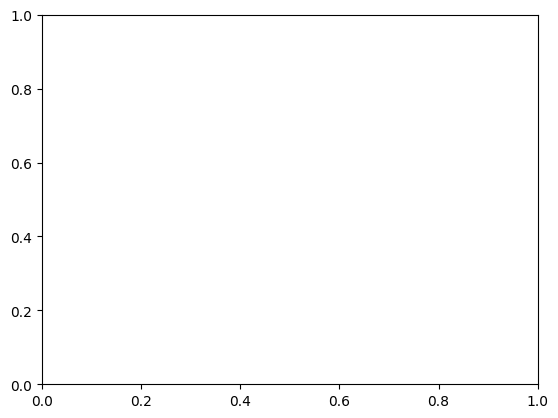

In [32]:
#création d'une figure vide
fig, ax = plt.subplots ()

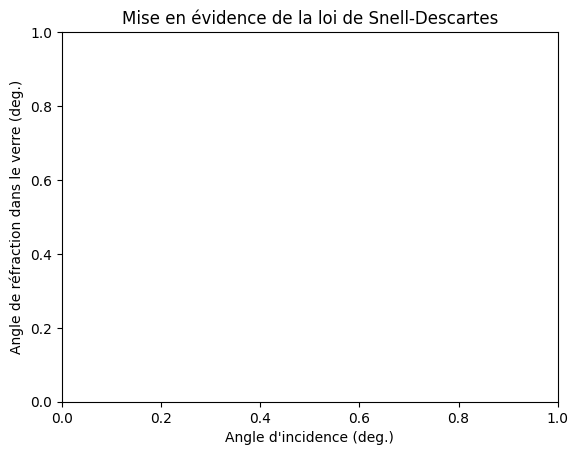

In [33]:
fig, ax = plt.subplots ()
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
plt.show ()

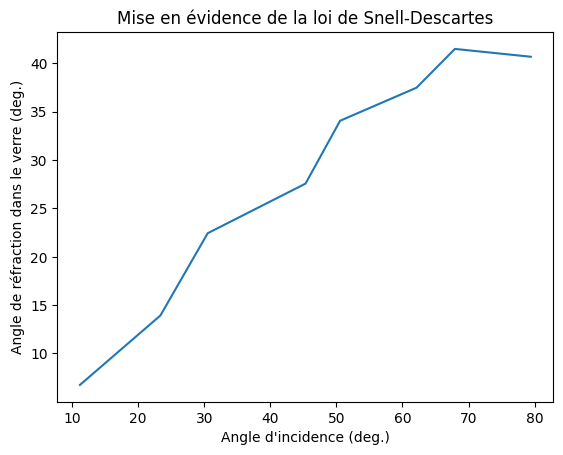

In [34]:
# tracé en ligne brisée
fig, ax = plt.subplots ()
lstyle = '-'
lwidth = 1.5
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
ax.plot (xi, yi, linestyle = lstyle, linewidth = lwidth)
plt.show ()

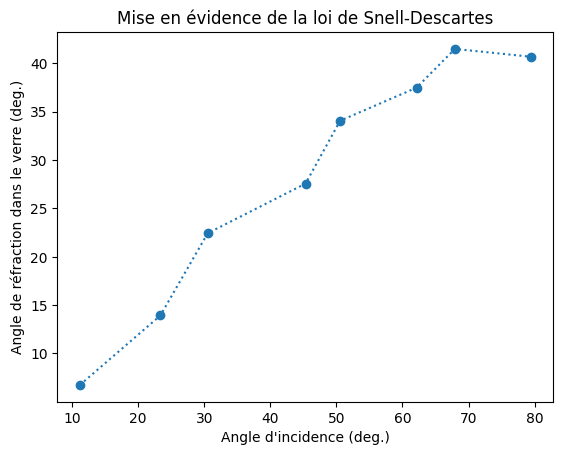

In [35]:
# ajout des points expérimentaux
fig, ax = plt.subplots ()
lstyle = ':'
lwidth = 1.5
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
ax.plot (xi, yi, linestyle = lstyle, linewidth = lwidth,
        marker = 'o')
plt.show ()

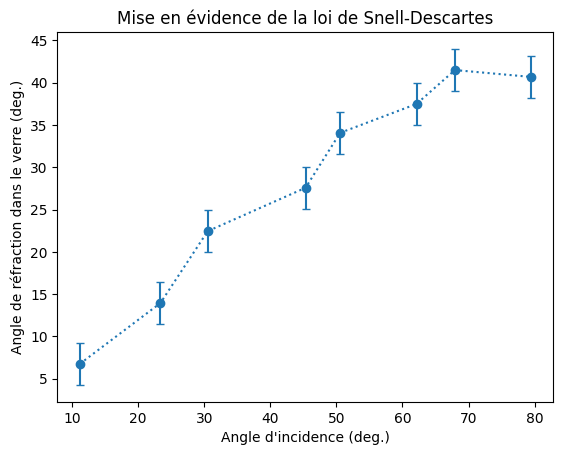

In [36]:
# affichage des barres d'erreur suivant y
fig, ax = plt.subplots ()
lstyle = ':'
lwidth = 1.5
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
ax.errorbar (xi, yi, delta_yi, linestyle = lstyle, linewidth = lwidth,
             marker = 'o',
             capsize = 3, capthick = 1)
plt.show ()

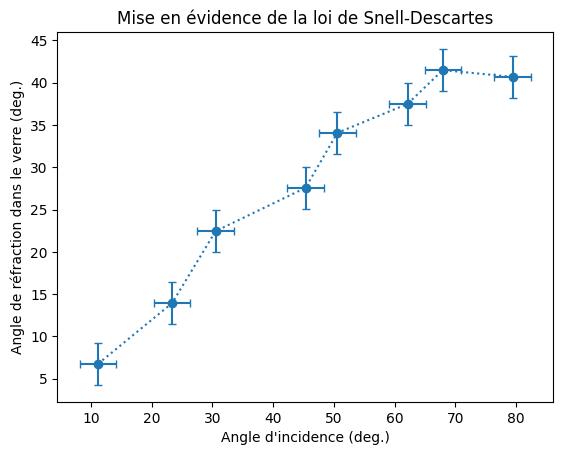

In [37]:
# affichage des barres d'erreur suivant y
fig, ax = plt.subplots ()
lstyle = ':'
lwidth = 1.5
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
ax.errorbar (xi, yi, delta_yi, delta_xi, linestyle = lstyle, linewidth = lwidth,
             marker = 'o',
             capsize = 3, capthick = 1)
plt.show ()

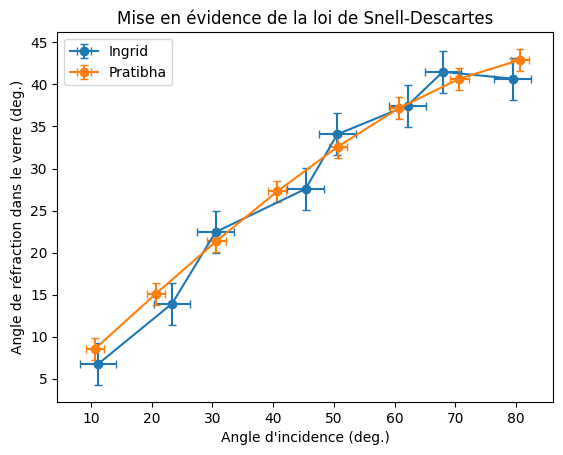

In [38]:
# affichage de plusieurs courbes
fig, ax = plt.subplots ()
lstyle = '-'
lwidth = 1.5
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
ax.errorbar (xi, yi, delta_yi, delta_xi, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Ingrid')
ax.errorbar (xp, yp, delta_yp, delta_xp, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Pratibha')
ax.legend ()
plt.show ()

## Figures multi-graphe

### subplots()

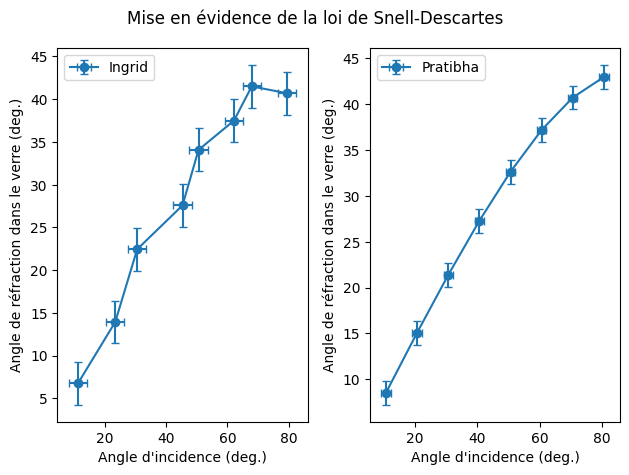

In [39]:
# affichage de plusieurs courbes
fig, axes = plt.subplots (ncols = 2)
lstyle = '-'
lwidth = 1.5
axes [0].errorbar (xi, yi, delta_yi, delta_xi, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Ingrid')
axes [1].errorbar (xp, yp, delta_yp, delta_xp, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Pratibha')
# attributs communs à tous les graphes
for ax in axes:
    ax.set_xlabel ("Angle d'incidence (deg.)")
    ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
    ax.legend ()

# attributs de la figure
fig.suptitle ('Mise en évidence de la loi de Snell-Descartes')
plt.tight_layout ()
plt.show ()

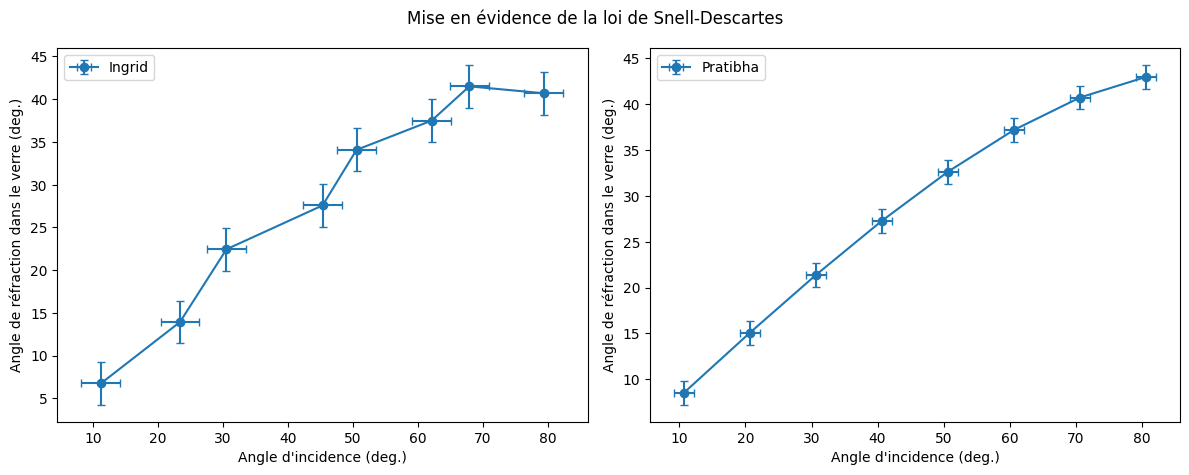

In [40]:
# affichage de plusieurs courbes
fig, axes = plt.subplots (ncols = 2, figsize = (12, 4.8))
lstyle = '-'
lwidth = 1.5
axes [0].errorbar (xi, yi, delta_yi, delta_xi, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Ingrid')
axes [1].errorbar (xp, yp, delta_yp, delta_xp, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Pratibha')
# attributs communs à tous les graphes
for ax in axes:
    ax.set_xlabel ("Angle d'incidence (deg.)")
    ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
    ax.legend ()

# attributs de la figure
fig.suptitle ('Mise en évidence de la loi de Snell-Descartes')
plt.tight_layout ()
plt.show ()

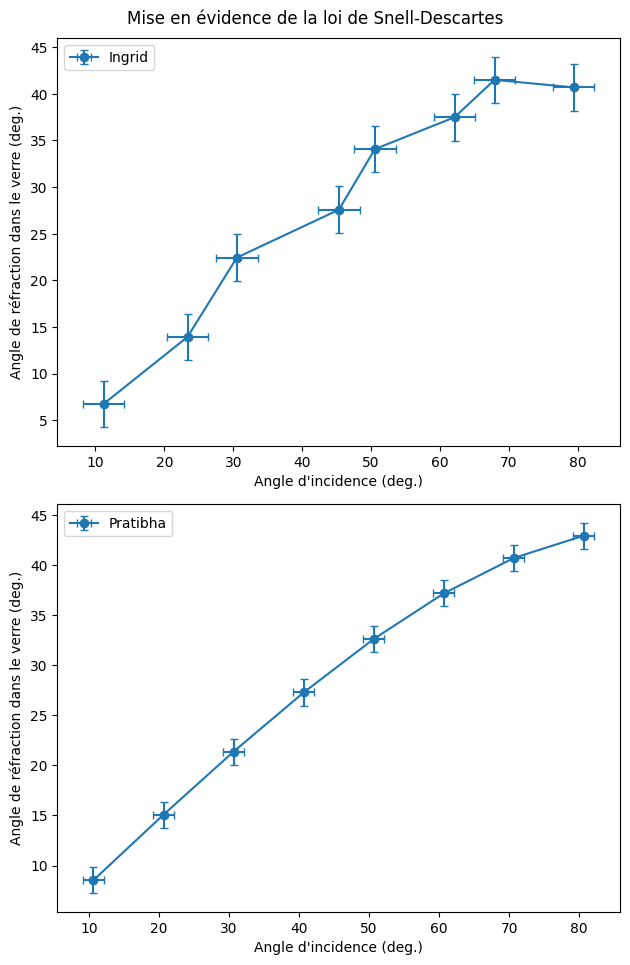

In [41]:
# affichage de plusieurs courbes
fig, axes = plt.subplots (nrows = 2, figsize = (6.4, 9.8))
lstyle = '-'
lwidth = 1.5
axes [0].errorbar (xi, yi, delta_yi, delta_xi, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Ingrid')
axes [1].errorbar (xp, yp, delta_yp, delta_xp, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Pratibha')
# attributs communs à tous les graphes
for ax in axes:
    ax.set_xlabel ("Angle d'incidence (deg.)")
    ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
    ax.legend ()

# attributs de la figure
fig.suptitle ('Mise en évidence de la loi de Snell-Descartes')
plt.tight_layout ()
plt.show ()

### twinx()

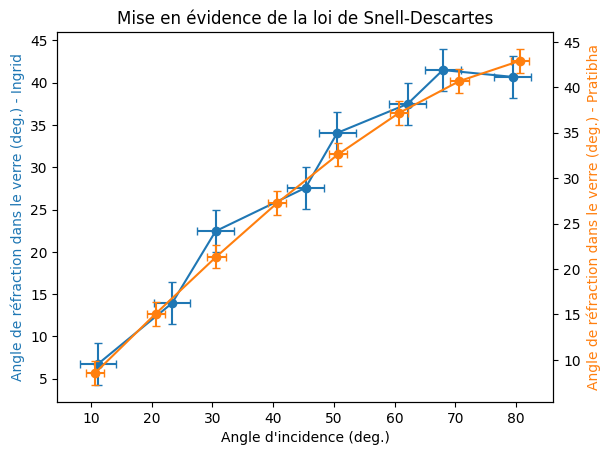

In [42]:
# affichage de plusieurs courbes
fig, ax = plt.subplots ()
lstyle = '-'
lwidth = 1.5
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.errorbar (xi, yi, delta_yi, delta_xi, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Ingrid',
             color = 'C0')
ax.set_ylabel ("Angle de réfraction dans le verre (deg.) - Ingrid", color = 'C0')
axT = ax.twinx ()

axT.errorbar (xp, yp, delta_yp, delta_xp, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Pratibha',
             color = 'C1')
axT.set_ylabel ("Angle de réfraction dans le verre (deg.) - Pratibha", color = 'C1')
plt.show ()

## Attributs d'une figure

#### Récréation
Combiner les paramètres de style pour produire la figure du meilleur goût.
Cherchez l'inspiration dans les documentations
[matplotlib markers](https://matplotlib.org/stable/api/markers_api.html)
et
[matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html).

Inscrivez votre nom, sauvegardez votre chef-d'oeuvre avec la méthode `fig.savefig()` et déposez-le sur [eCampus](https://ecampus.paris-saclay.fr/mod/assign/view.php?id=2371357)

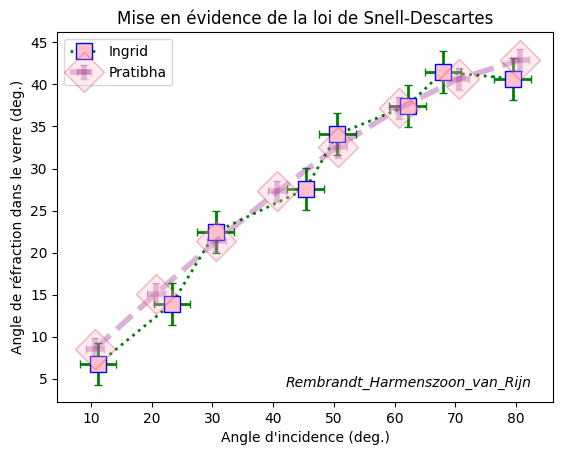

In [43]:
# Tuning !!!!
path2output = 'output/'
lstyle = '-'
lwidth = 1.5
Ingrid_style = {
    'linestyle': ':',
    'linewidth': 2,
    'marker': 's',
    'markersize': 12,
    'markerfacecolor': 'pink',
    'markeredgecolor': 'blue',
    'color': 'green',
    'alpha': 1,
    # error bar style
    'capsize': 3,
    'capthick': 1
}

Pratibha_style = {
    'linestyle': 'dashed',
    'linewidth': 4,
    'marker': 'D',
    'markersize': 20,
    'markerfacecolor': 'pink',
    'markeredgecolor': 'crimson',
    'color': 'purple',
    'alpha': .3,
    # error bar style
    'capsize': 3,
    'capthick': 1
}

fig, ax = plt.subplots ()
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
ax.errorbar (xi, yi, delta_yi, delta_xi, **Ingrid_style, label = 'Ingrid')
ax.errorbar (xp, yp, delta_yp, delta_xp, **Pratibha_style, label = 'Pratibha')
mon_nom = 'Rembrandt_Harmenszoon_van_Rijn'
ax.text (42, 4, mon_nom, fontstyle = 'italic')
ax.legend ()
fig.savefig (path2output)
plt.show ()

## Consignes de mise en forme d'une figure
Dans la pratique, le choix des paramètres des courbes est dicté deux critères :
- la lisibilité (tailles des polices, compatibilité monochrome, daltonien, _etc._)
- les attributs de la courbe doivent **contribuer au message de la figure** (taille du point vs. incertitude, échelle, _etc._)

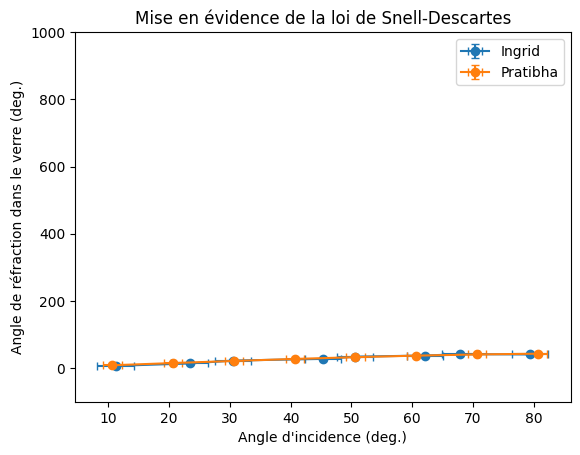

In [44]:
# Je veux montrer que les valeurs sont petites
fig, ax = plt.subplots ()
lstyle = '-'
lwidth = 1.5
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
ax.errorbar (xi, yi, delta_yi, delta_xi, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Ingrid')
ax.errorbar (xp, yp, delta_yp, delta_xp, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Pratibha')
ax.legend ()
ax.set_ylim (-100, 1000)
plt.show ()

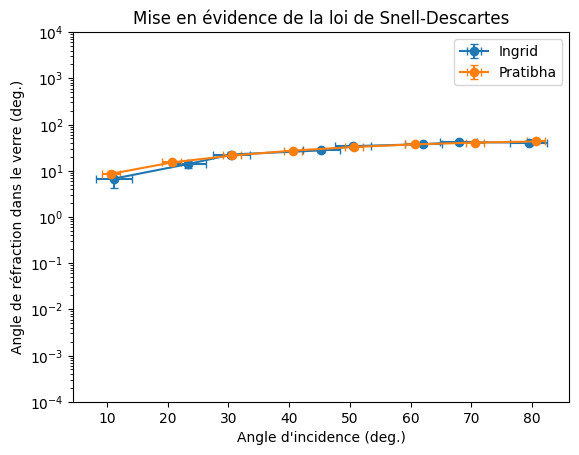

In [45]:
# Je veux montrer que la variation est faible
fig, ax = plt.subplots ()
lstyle = '-'
lwidth = 1.5
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
ax.errorbar (xi, yi, delta_yi, delta_xi, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Ingrid')
ax.errorbar (xp, yp, delta_yp, delta_xp, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'o', label = 'Pratibha')
ax.legend ()
ax.set_yscale ('log')
ax.set_ylim (1e-4, 1e4)
plt.show ()

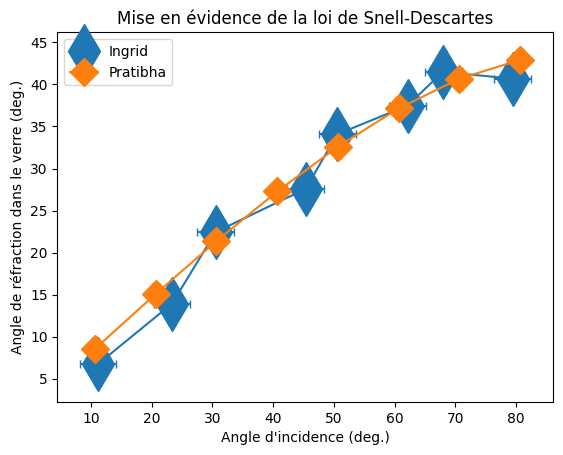

In [46]:
# Je connais les barres d'erreurs mais je ne veux pas les afficher (avec bonne foi)
fig, ax = plt.subplots ()
lstyle = '-'
lwidth = 1.5
ax.set_title ('Mise en évidence de la loi de Snell-Descartes')
ax.set_xlabel ("Angle d'incidence (deg.)")
ax.set_ylabel ("Angle de réfraction dans le verre (deg.)")
ax.errorbar (xi, yi, delta_yi, delta_xi, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'd', label = 'Ingrid',
            markersize = 28)
ax.errorbar (xp, yp, delta_yp, delta_xp, linestyle = lstyle, linewidth = lwidth,
             capsize = 3, capthick = 1,
             marker = 'D', label = 'Pratibha',
            markersize = 14)
ax.legend ()
plt.show ()